
# Project: Investigate Movieset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Information**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>    Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
>    There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
>    The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [3]:
df.info()
#All the ids are available. Keywords, cast,director, taglines and production_companies are sometimes missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Looking at the type closely. id is an integer.It is correct. Release date and release year will be converted to
#datetime 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
#From what i can see popularity should be either cast to integer or rounded to maximal 1 decimal
#We have 56 years
#Variables of interest are popularity, budget, genres, release_year and vote_count.
df['vote_average'].describe()
df['popularity'].describe()
df['budget'].describe()
df['revenue'].describe()
df['keywords'].describe()

count               9373
unique              8804
top       woman director
freq                 134
Name: keywords, dtype: object

In [7]:
df['production_companies'].duplicated().sum()
df['production_companies']

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
                               ...                        
10861                                    Bruce Brown Films
10862    Cherokee Productions|Joel Productions|Douglas ...
10863                                              Mosfilm
10864                              Benedict Pictures Corp.
10865                                            Norm-Iris
Name: production_companies, Length: 10866, dtype: object

In [8]:
df['tagline']

0                                        The park is open.
1                                       What a Lovely Day.
2                               One Choice Can Destroy You
3                            Every generation has a story.
4                                      Vengeance Hits Home
                               ...                        
10861                                                  NaN
10862    Cinerama sweeps YOU into a drama of speed and ...
10863                                                  NaN
10864                            WOODY ALLEN STRIKES BACK!
10865         It's Shocking! It's Beyond Your Imagination!
Name: tagline, Length: 10866, dtype: object

<h1> Data Cleaning (Correcting the datatypes) </h1>

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#df['popularity'] = df['popularity'].round(5)
#df.nunique()
rounded = df['popularity'].round(decimals = 2)
rounded
df['popularity'] = rounded
df['release_date']= pd.to_datetime(df['release_date'])
#df['release_year']= pd.to_datetime(df['release_year'])# I choose to keep it as a string



<h1>Data Cleaning (Replacing the missing values)  </h1>

In [10]:
values ={ 'cast':'not known' ,'genres':'not known' ,'homepage': 'not known' ,'production_companies' :'not known' ,'keywords':'None','tagline':'None',
        'director':'not listed'}
df.fillna(values, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

<h2> Create new category for main genre, main actor, main keyword and main production companies.
This column can help us to identiy which studios, actors and genres can be associated with successful movies.
</h2>

<h2>Separating the genres </h2>

In [12]:
#Create copies of the dataframe containing more than 1 genres
df1_genres = df[df['genres'].str.contains('|')]
#create a copy that identify multi cast members, more than 1 actor
df1_cast = df[df['cast'].str.contains('|')]

In [13]:
#columns to split by "|" I create a copy to make the transformation and copy it back to the main dataframe
df_1 = df1_genres.copy()
df_2 = df1_cast.copy()

In [14]:
#Extract the main genre, main actor and main production studio
split_columns = ['genres' ,'cast','production_companies']
for c in split_columns:
    df_1[c]=df_1[c].apply(lambda x: x.split("|")[0]) #main genre, actor and production

In [15]:
#Create an augmented dataframe
df_aug = df
df_aug['main_genre'] = df_1['genres']
df_aug['main_actor'] = df_1['cast']
df_aug['main_studio'] = df_1['production_companies']

In [16]:
df_aug.head()
df_aug.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610       32.99  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

  vote_average release_year    budget_adj   revenue_adj  main_genre  \
0          6.5         2015  1.379999e+08  1.392446e+09      Action   

    main_actor        main_studio  
0  Chris Pratt  Universal Studios  

[1 rows x 24 columns]

In [17]:
res_cast_incomplete = pd.DataFrame(df_aug.query('cast == "not known"')).copy()
res_cast_incomplete['dynamic_duo_actors'] ='not known'

In [18]:
res_cast_available = pd.DataFrame(df_aug.query('cast != "not known"')).copy()
res_cast_available.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610       32.99  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

  vote_average release_year    budget_adj   revenue_adj  main_genre  \
0          6.5         2015  1.379999e+08  1.392446e+09      Action   

    main_actor        main_studio  
0  Chris Pratt  Universal Studios  

[1 rows x 24 columns]

<a id='eda'></a>
## Exploratory Data Analysis

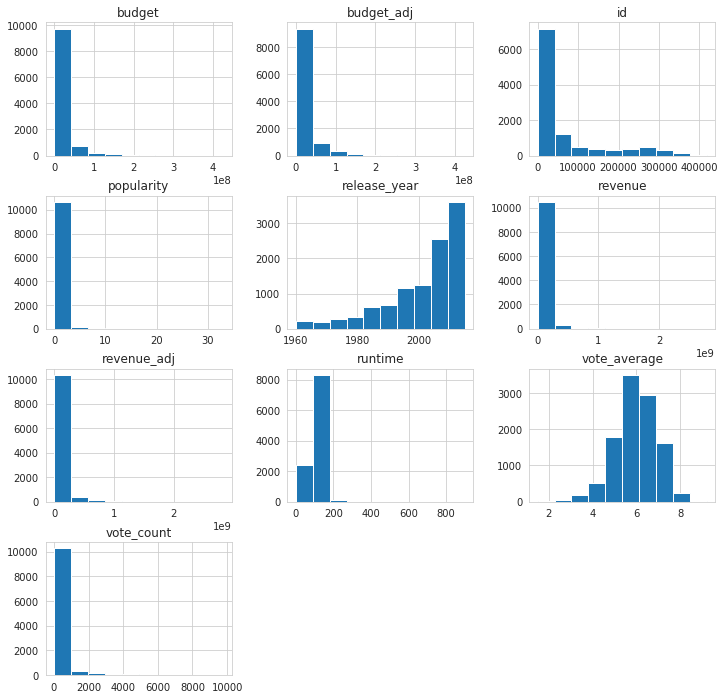

In [19]:
#General visualization of the data
df.hist(figsize=(12,12));

<h1>Visualize the correlation between variables</h1>

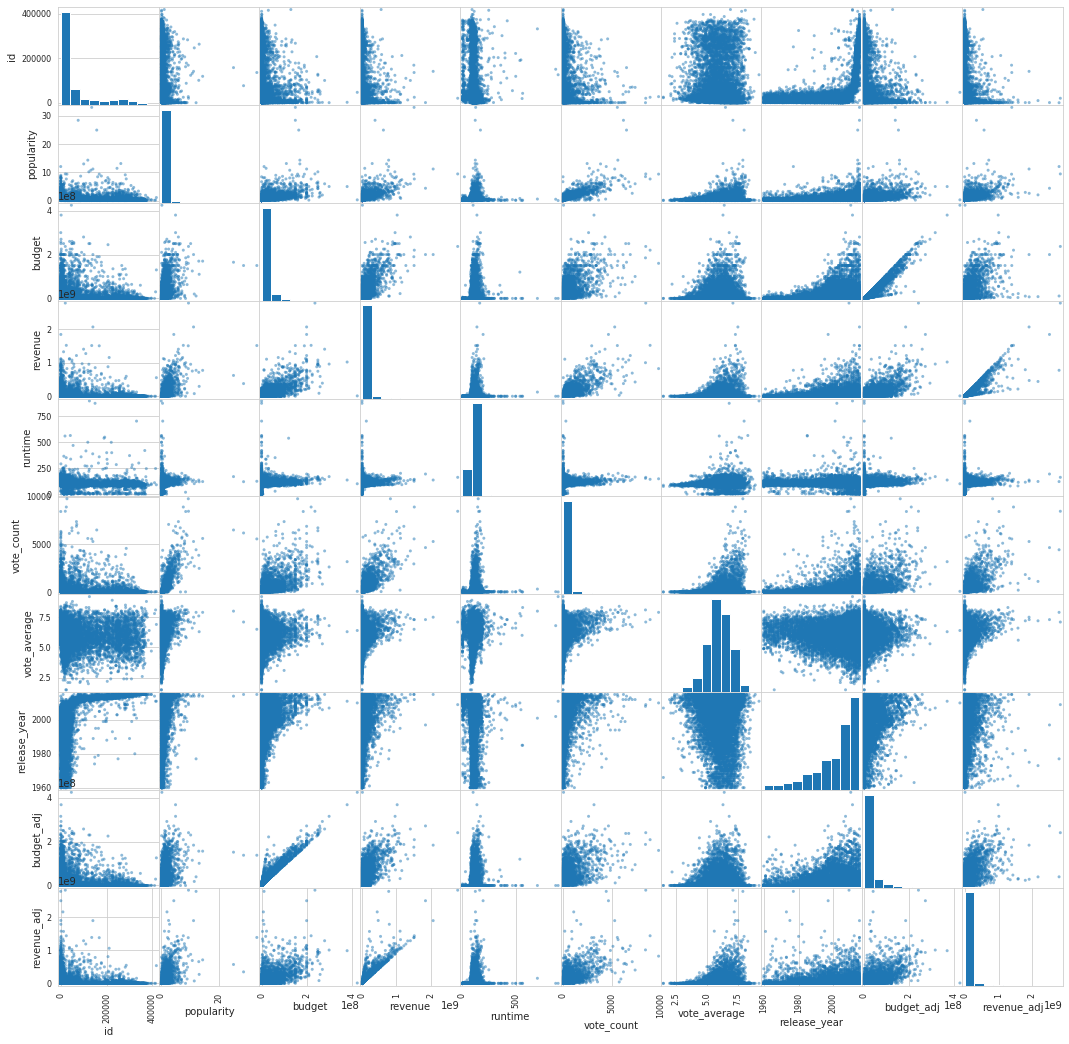

In [20]:
pd.plotting.scatter_matrix(df, figsize=(18,18));


### Does the popularity strongly correlate with the vote average ?  

In [21]:

df['popularity'].describe()

count    10866.000000
mean         0.646454
std          1.000214
min          0.000000
25%          0.210000
50%          0.380000
75%          0.710000
max         32.990000
Name: popularity, dtype: float64

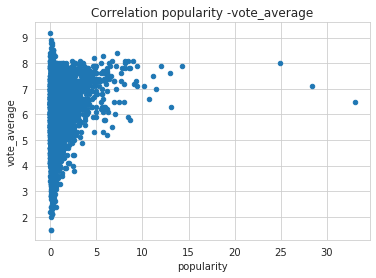

In [22]:
df.plot(x='popularity' , y='vote_average' , kind = 'scatter' ,title='Correlation popularity -vote_average');
#Some movies are extremely popular with an average average

<h2>There is a strong correlation between both variables </h2>

<h1>Which studios are the most successful ?</h1>

In [23]:
df.nunique()

id                      10865
imdb_id                 10855
popularity                483
budget                    557
revenue                  4702
original_title          10571
cast                    10720
homepage                 2897
director                 5068
tagline                  7998
keywords                 8805
overview                10847
runtime                   247
genres                   2040
production_companies     7446
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
main_genre                 21
main_actor               4301
main_studio              3058
dtype: int64

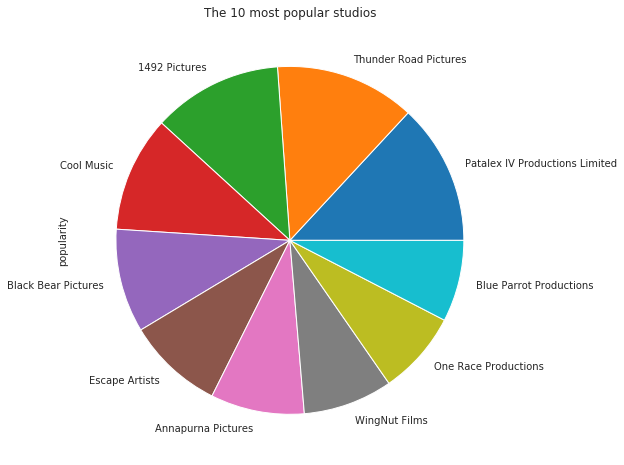

In [24]:
df.groupby('main_studio')['popularity'].mean().sort_values(ascending = False).head(10).plot(figsize =(8,8),kind='pie', title ='The 10 most popular studios');

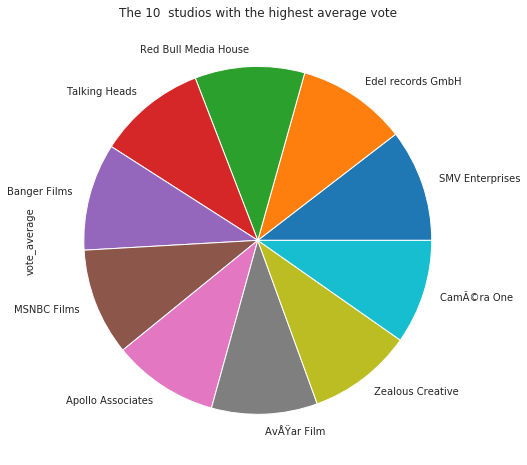

In [25]:
df.groupby('main_studio')['vote_average'].mean().sort_values(ascending = False).head(10).plot(figsize =(8,8),kind='pie', title ='The 10  studios with the highest average vote');

In [26]:
df.groupby('main_genre')['popularity'].mean().sort_values(ascending = False)

main_genre
Adventure          1.218020
Science Fiction    1.073178
Fantasy            0.865184
Action             0.836396
Animation          0.810496
War                0.767119
History            0.764318
Family             0.730764
Romance            0.704247
Crime              0.694199
Western            0.690714
Thriller           0.673259
Mystery            0.596800
Drama              0.552438
Comedy             0.537141
Horror             0.468667
Music              0.447800
TV Movie           0.245641
Documentary        0.176968
not known          0.167826
Foreign            0.166667
Name: popularity, dtype: float64

<h1>Which genres are the most popular and have the highest average_vote ?  </h1>

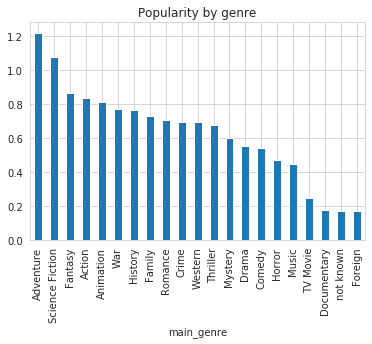

In [27]:
df.groupby('main_genre')['popularity'].mean().sort_values(ascending = False).plot(kind='bar', title ='Popularity by genre');

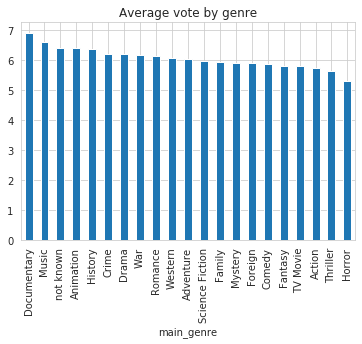

In [28]:
df.groupby('main_genre')['vote_average'].mean().sort_values(ascending = False).plot(kind='bar', title='Average vote by genre');

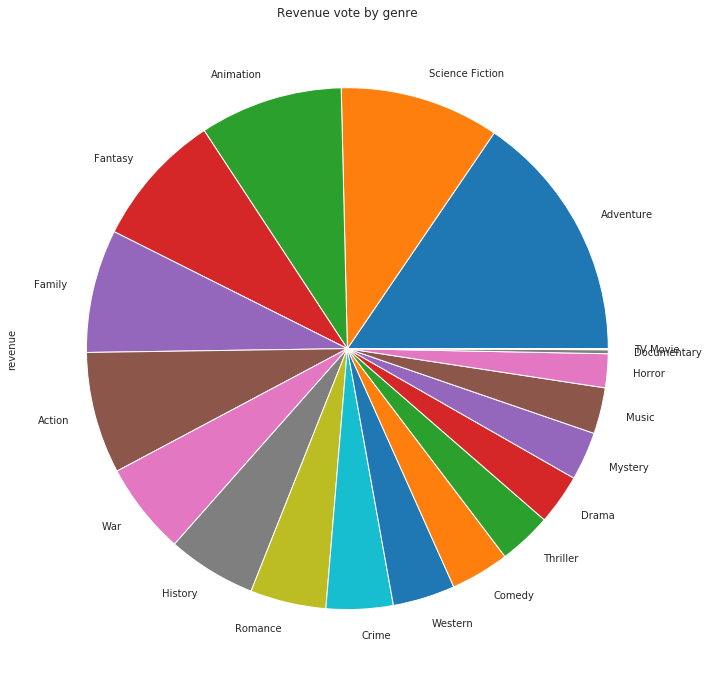

In [29]:
df.groupby('main_genre')['revenue'].mean().sort_values(ascending = False).plot(figsize =(12,12),kind='pie', title='Revenue vote by genre');

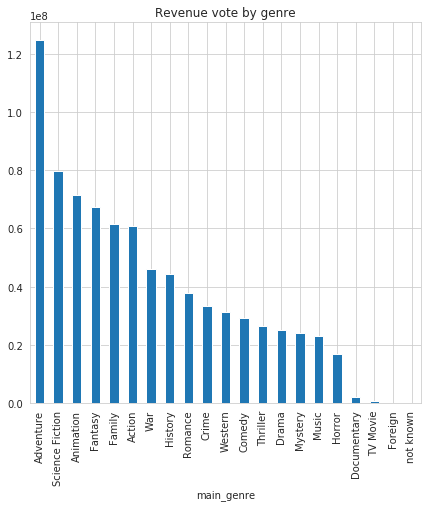

In [30]:
df.groupby('main_genre')['revenue'].mean().sort_values(ascending = False).plot(figsize =(7,7),kind='bar', title='Revenue vote by genre');

<p>Adventure and science fictions are dominant genres</p>

### How did the budget and the popularity changed over time ?

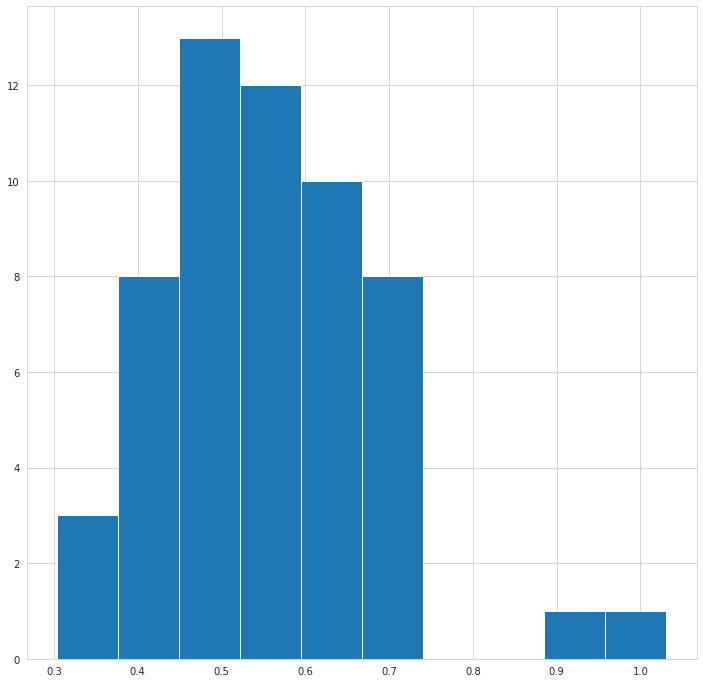

In [31]:
import matplotlib
df_year = df.sort_values(by ='release_year')
df_year.groupby('release_year')['popularity'].mean().hist(figsize=(12,12) );
#Distribution

In [32]:
#populairty average by year
al_pd= df_year.groupby('release_year')['popularity'].mean()
al_pd.head()
df_avg_year =al_pd

In [33]:

df_avg_year.head(2)

release_year
1960    0.459063
1961    0.422581
Name: popularity, dtype: float64

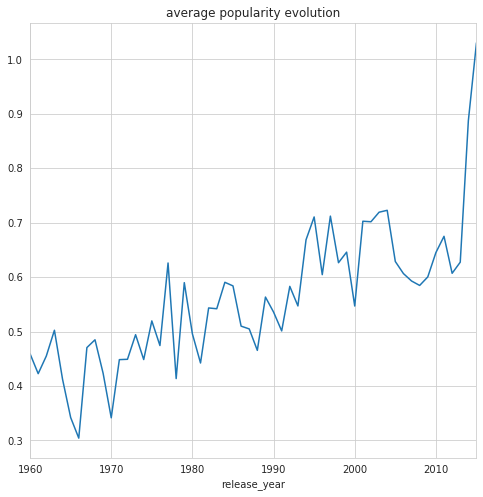

In [34]:
df_avg_year.plot(x ='release_year', y='popularity', kind = 'line', figsize =(8,8) ,title='average popularity evolution');

In [35]:
#budget evolution
#popularity avergae by year
al_pd= df_year.groupby('release_year')['budget'].mean()
al_pd.head()
df_avg_budget_year =al_pd

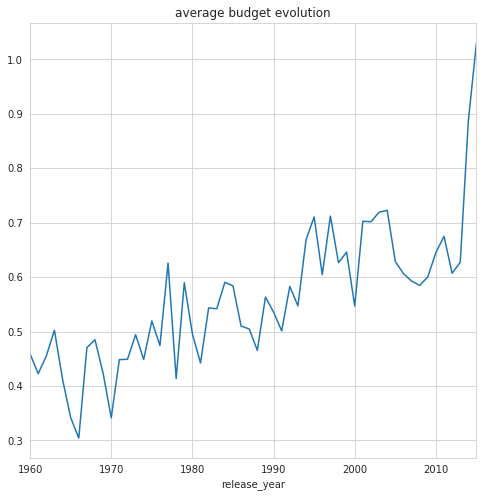

In [36]:
df_avg_year.plot(x ='release_year', y='budget', kind = 'line', figsize =(8,8) ,title='average budget evolution');

<h2> Let's compute the total budget by year</h2>

In [37]:
#budget evolution
#popularity avergae by year
al_pd= df_year.groupby('release_year')['budget'].sum()
al_pd.head()
df_avg_budget_year =al_pd

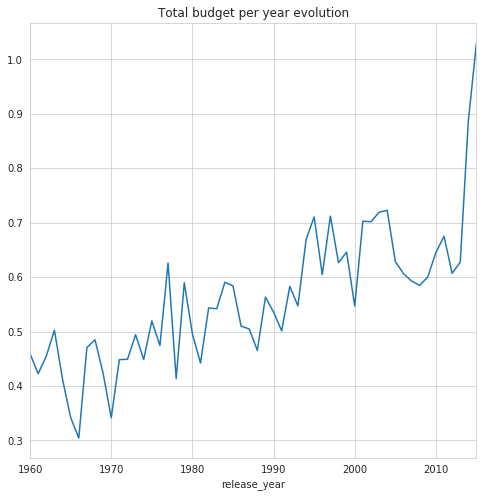

In [38]:
df_avg_year.plot(x ='release_year', y='budget', kind = 'line', figsize =(8,8) ,title='Total budget per year evolution');

<h1> How can i group the set of films in 4 categories using the popularity ?</h1>


In [39]:
infos_popularity = df['popularity'].describe()
infos_popularity

count    10866.000000
mean         0.646454
std          1.000214
min          0.000000
25%          0.210000
50%          0.380000
75%          0.710000
max         32.990000
Name: popularity, dtype: float64

In [40]:
# access median median = infos_popularity.loc['50%']

In [41]:
df_very_popular = df.query('popularity > {}'.format(infos_popularity.loc['75%']) )
df_popular = df.query('popularity ==[{},{} ]'.format(infos_popularity.loc['50%'] ,infos_popularity.loc['75%']) )
df_medium_popular = df.query('popularity ==[{},{} ]'.format(infos_popularity.loc['25%'],infos_popularity.loc['50%']) ) 
df_not_popular = df.query('popularity < {}'.format(infos_popularity.loc['25%'])   )

In [42]:
df_medium_popular.head(1)


id    imdb_id  popularity  budget  revenue original_title  \
314  241855  tt3395184        0.38       0    49970         Spring   

                                                  cast   homepage  \
314  Lou Taylor Pucci|Nadia Hilker|Nick Nevern|Augi...  not known   

                         director             tagline  ...  \
314  Aaron Moorhead|Justin Benson  Love is a monster.  ...   

    production_companies release_date  vote_count vote_average release_year  \
314            XYZ Films   2015-03-20         110          6.5         2015   

    budget_adj   revenue_adj  main_genre        main_actor  main_studio  
314        0.0  45972.379772      Horror  Lou Taylor Pucci    XYZ Films  

[1 rows x 24 columns]

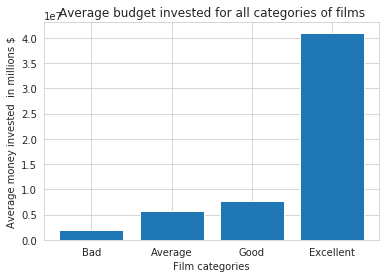

In [43]:
# Create a bar chart with proper labels
locations = [1, 2 , 3, 4]
heights = [df_not_popular['budget'].mean(), df_medium_popular['budget'].mean() , df_popular['budget'].mean() , df_very_popular['budget'].mean()]                    
labels = ['Bad', 'Average','Good', 'Excellent']
plt.bar(locations, heights, tick_label=labels )
plt.title('Average budget invested for all categories of films')
plt.xlabel('Film categories')
plt.ylabel('Average money invested  in millions $');

<h2>You cannot make a good movie without sufficient monetary ressources</h2>

<h1>Summary</h1>

<a id='conclusions'></a>



<ul style="color:red;font-size:10px;>
<li>Adventure and Science fiction are two of the three main genres.</li>
<li>There is a strong correlation between popularity and average_vote.</li>
<li>Since 1960s there has been an exponetial increase in the budget spent to create movies.</li>
<li>You cannot make a good movie without sufficient monetary ressources </li>
</ul>

<ul >
<li> There is a strong correlation between average_vote and popularity   </li>
<li> The most popular and best voted main studio are different, respectively: Palatex and SVM  </li>
<li>Observing revenue and popularity adventure and science fictions are the two most dominant genres </li>
<li>Since 1960 the total amount of money invested in movies increased exponentially. Between 1963 and 1965 we have the minimal values, while 2015 is very high.  </li>
<li>From a user perspective for that many films a nominal categorization of films is more appropriate.</li>

</ul>

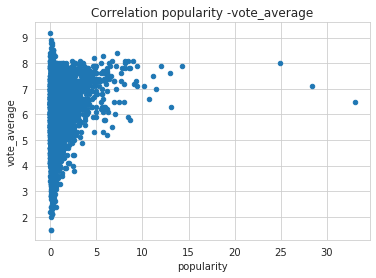

In [44]:
df.plot(x='popularity' , y='vote_average' , kind = 'scatter' ,title='Correlation popularity -vote_average');
#Some movies are extremely popular with an average average

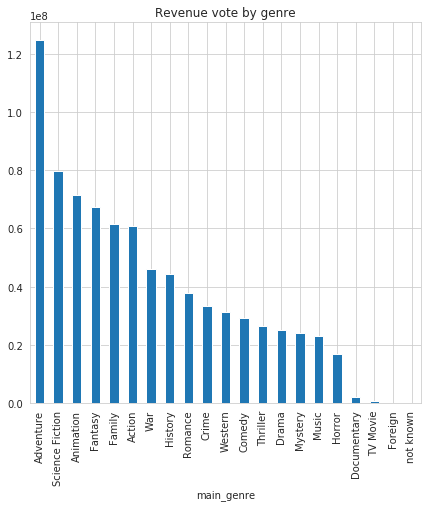

In [45]:
df.groupby('main_genre')['revenue'].mean().sort_values(ascending = False).plot(figsize =(7,7),kind='bar', title='Revenue vote by genre');

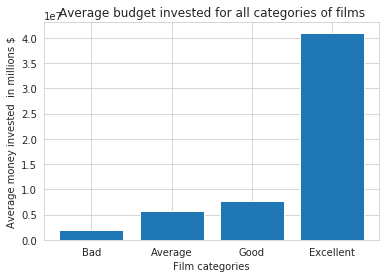

In [46]:
# Create a bar chart with proper labels
locations = [1, 2 , 3, 4]
heights = [df_not_popular['budget'].mean(), df_medium_popular['budget'].mean() , df_popular['budget'].mean() , df_very_popular['budget'].mean()]                    
labels = ['Bad', 'Average','Good', 'Excellent']
plt.bar(locations, heights, tick_label=labels )
plt.title('Average budget invested for all categories of films')
plt.xlabel('Film categories')
plt.ylabel('Average money invested  in millions $');

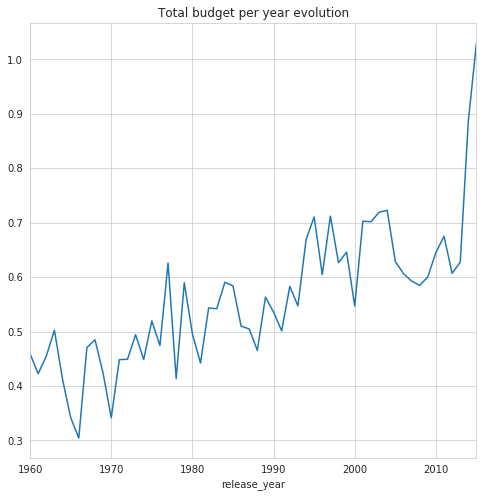

In [47]:
df_avg_year.plot(x ='release_year', y='budget', kind = 'line', figsize =(8,8) ,title='Total budget per year evolution');